In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot
import warnings
import statsmodels.formula.api as smf

In [2]:
coca=pd.read_excel("E:/SHRADDHA/DA-DS Assignments/DS Assignments/18.A_Forecating/CocaCola_Sales_Rawdata.xlsx")
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


# Data Visualisation

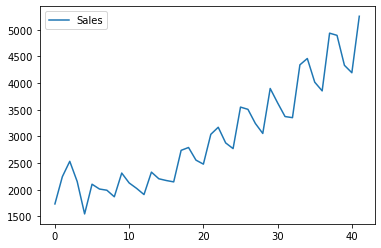

In [4]:
from matplotlib import pyplot
coca.plot()
pyplot.show()

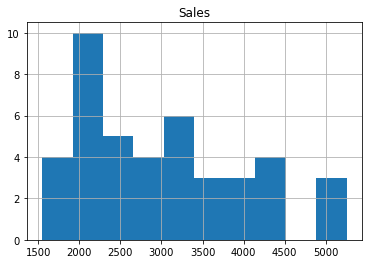

In [5]:
#histogram
coca.hist()
pyplot.show()

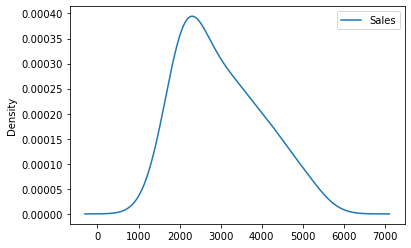

In [6]:
#density plot
coca=pd.read_excel("E:/SHRADDHA/DA-DS Assignments/DS Assignments/18.A_Forecating/CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True)
coca.plot(kind='kde')
pyplot.show()

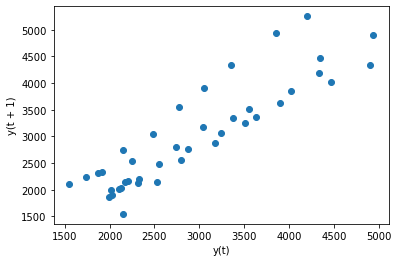

In [7]:
#lag plot
lag_plot(coca)
pyplot.show()

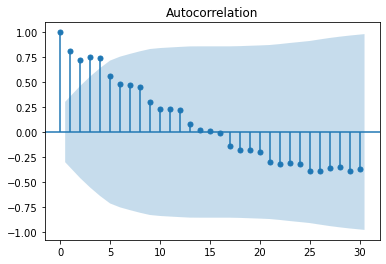

In [8]:
#acf plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(coca,lags=30)
pyplot.show()

# Model Building

In [9]:
coca=pd.read_excel("E:/SHRADDHA/DA-DS Assignments/DS Assignments/18.A_Forecating/CocaCola_Sales_Rawdata.xlsx")

In [10]:
coca['Quarters']= 0
coca['Year'] = 0
for i in range(42):
    p = coca["Quarter"][i]
    coca['Quarters'][i]= p[0:2]
    coca['Year'][i]= p[3:5]
coca.head()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_16400/1689538411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca['Quarters'][i]= p[0:2]
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lenovo\AppData\Local\Temp/ipykernel_16400/1689538411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca['Year'][i

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [11]:
Q_dum=pd.DataFrame(pd.get_dummies(coca.Quarters))
Q_dum.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [12]:
coca=pd.concat([coca,Q_dum],axis=1)
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [13]:
coca['t']=range(1,43)
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5


In [14]:
coca['t_squared']=coca.t*coca.t
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25


In [15]:
coca['log_Sales']=np.log(coca.Sales)
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

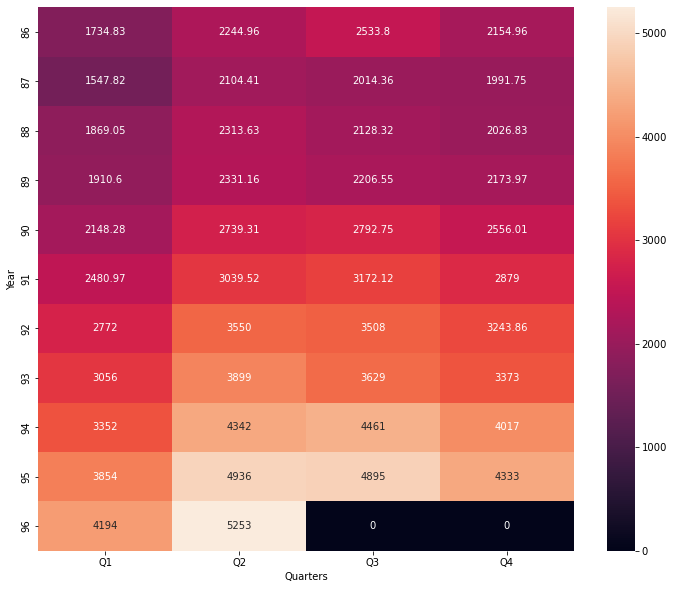

In [16]:
plt.figure(figsize=(12,10))
plot_month_y=pd.pivot_table(data=coca,values='Sales',index='Year',columns='Quarters',aggfunc='mean',fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt='g')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

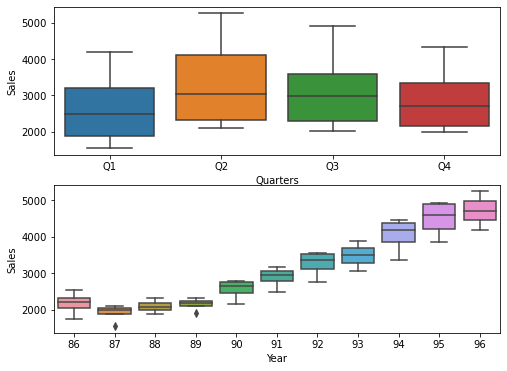

In [17]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=coca)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=coca)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

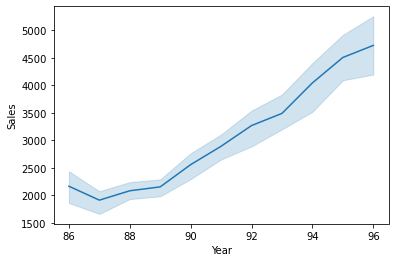

In [18]:
sns.lineplot(x='Year',y='Sales',data=coca)

# Splitting the data

In [19]:
train=coca.head(35)
test=coca.tail(7)

# Linear Model

In [20]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351148

# Exponential Model

In [21]:
exp_model = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

493.348648484222

# Quadratic Model

In [22]:
quad_model = smf.ols('Sales~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

511.8117319417597

# Additive Seasonality Model

In [23]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251756

# Additive Seasonality Quadratic Model

In [24]:
add_sea_Quad_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.4641395163228

# Multiplicative Seasonality Model

In [25]:
mul_sea_model = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mul_sea_model.predict(test))
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1938.933235196624

# Multiplicative Seasonality Quadratic Model

In [26]:
mul_sea_Quad_model = smf.ols('log_Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_sea_quad = pd.Series(mul_sea_Quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
rmse_mul_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_mul_sea_quad))**2))
rmse_mul_sea_quad

4515.62473844014

# Multiplicative Additive Seasonality

In [27]:
mul_add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

339.1874666994702

# Comparing results

In [28]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","rmse_Mult_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea,rmse_mul_sea_quad])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235
7,rmse_Mult_sea_quad,4515.624738


# Predict for new time period

In [29]:
pred_data=coca
pred_data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [30]:
#build the model on entire dataset
model_full=smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=coca).fit()

RMSE shows the original error. In this case Additive Seasonality Quadratic model shows the least error. Hence we'll use its rmse value to forecast the model.

In [31]:
pred_new=pd.Series(add_sea_Quad_model.predict(pred_data))
pred_new

0     1715.011163
1     2277.750192
2     2194.873446
3     1919.651866
4     1703.261332
5     2283.439187
6     2218.001266
7     1960.218512
8     1761.266805
9     2358.883485
10    2310.884390
11    2070.540461
12    1889.027579
13    2504.083086
14    2473.522816
15    2250.617713
16    2086.543657
17    2719.037989
18    2705.916545
19    2500.450268
20    2353.815037
21    3003.748194
22    3008.065576
23    2820.038125
24    2690.841720
25    3358.213703
26    3379.969910
27    3209.381284
28    3097.623705
29    3782.434514
30    3821.629547
31    3668.479747
32    3574.160993
33    4276.410627
34    4333.044486
35    4197.333511
36    4120.453583
37    4840.142044
38    4914.214728
39    4795.942579
40    4736.501477
41    5473.628762
dtype: float64

In [32]:
pred_data['forecated_sales']=pd.Series(pred_new)
pred_data

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales,forecated_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1715.011163
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,2277.750192
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,2194.873446
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1919.651866
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1703.261332
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,2283.439187
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,2218.001266
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,1960.218512
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,1761.266805
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,2358.883485
